In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)


In [2]:
df = pd.read_csv('C:/Users/ps3ma/New folder/miami/play_by_play_2023.csv')
df

C:\Users\ps3ma\AppData\Local\Temp\ipykernel_34200\2621623155.py:1: DtypeWarning: Columns (179,180,182,183,205,206,218,219,220,222,224,226,253,254,255,260,262,263,283,284,332) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/ps3ma/New folder/miami/play_by_play_2023.csv')


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,...,drive_play_id_ended,away_score,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,aborted_play,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,fantasy_player_name,fantasy_player_id,fantasy,fantasy_id,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,NaN,NaN,NaN,NaN,NaN,2023-09-10,900,1800,3600,Half1,0,NaN,0,1,NaN,0,15:00,ARI 35,0,NaN,GAME,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,...,NaN,16,20,Home,4,36,7.0,38.0,0,outdoors,NaN,NaN,NaN,Ron Rivera,Jonathan Gannon,WAS00,FedExField,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,ARI,35.0,2023-09-10,900,1800,3600,Half1,0,1.0,0,1,NaN,0,15:00,ARI 35,0,26.0,5-M.Prater kicks 65 yards from ARI 35 to end z...,kickoff,0.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,3,3,0.0,NaN,...,245.0,16,20,Home,4,36,7.0,38.0,0,outdoors,NaN,NaN,NaN,Ron Rivera,Jonathan Gannon,WAS00,FedExField,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,WAS,75.0,2023-09-10,900,1800,3600,Half1,0,1.0,0,1,1.0,0,15:00,WAS 25,10,26.0,(15:00) (Shotgun) 8-B.Robinson right tackle to...,run,3.0,1,0,0.0,0,0,0,NaN,NaN,NaN,NaN,right,tackle,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,245.0,16,20,Home,4,36,7.0,38.0,0,outdoors,NaN,NaN,NaN,Ron Rivera,Jonathan Gannon,WAS00,FedExField,0,0.0,NaN,NaN,B.Robinson,8.0,NaN,NaN,0,1,0.0,0,1,NaN,00-0037746,NaN,B.Robinson,8.0,00-0037746,B.Robinson,00-0037746,B.Robinson,00-0037746,0,1,-0.336103,NaN,NaN,NaN,NaN,NaN,0.515058,-51.505846
3,77,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,WAS,72.0,2023-09-10,870,1770,3570,Half1,0,1.0,0,1,2.0,0,14:30,WAS 28,7,26.0,(14:30) (Shotgun) 14-S.Howell pass short right...,pass,6.0,1,0,1.0,0,0,0,short,right,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,245.0,16,20,Home,4,36,7.0,38.0,0,outdoors,NaN,NaN,NaN,Ron Rivera,Jonathan Gannon,WAS00,FedExField,0,1.0,S.Howell,14.0,NaN,NaN,J.Dotson,1.0,1,0,0.0,0,1,00-0037077,NaN,00-0037741,S.Howell,14.0,00-0037077,J.Dotson,00-0037741,J.Dotson,00-0037741,0,1,0.703308,0.340652,3.328642,1.0,0.996628,0.583928,0.661106,33.889407
4,102,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,WAS,66.0,2023-09-10,835,1735,3535,Half1,0,1.0,0,1,3.0,0,13:55,WAS 34,1,26.0,(13:55) 23-C.Rodriguez left guard to WAS 36 fo...,run,2.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,left,guard,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,245.0,16,20,Home,4,36,7.0,38.0,0,outdoors,NaN,NaN,NaN,Ron Rivera,Jonathan Gannon,WAS00,FedExField,0,1.0,NaN,NaN,C.Rodriguez,23.0,NaN,NaN,0,1,1.0,0,1,NaN,00-0038611,NaN,C.Rodriguez,23.0,00-0038611,C.Rodriguez,00-0038611,C.Rodriguez,00-0038611,0,1,0.469799,NaN,NaN,NaN,NaN,NaN,0.196065,-19.606467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
avg_df = df.copy()
df = df[(df['posteam'] != 'MIA') & ((df['home_team'] == 'MIA') | (df['away_team'] == 'MIA'))]

In [4]:
df = df[(df['play_type'] != 'no_play') & (df['play_type'] != 'kickoff') & (df['play_type'] != 'punt') &(df['play_type'] != 'extra_point') &(df['play_type'] != 'qb_kneel') &(df['play_type'] != 'field_goal')  ]

In [5]:
df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,...,drive_play_id_ended,away_score,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,aborted_play,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,fantasy_player_name,fantasy_player_id,fantasy,fantasy_id,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
1911,1,2023_01_MIA_LAC,2023091010,LAC,MIA,REG,1,NaN,NaN,NaN,NaN,NaN,2023-09-10,900,1800,3600,Half1,0,NaN,0,1,NaN,0,15:00,LAC 35,0,NaN,GAME,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,...,NaN,36,34,Home,-2,70,3.0,50.5,0,dome,NaN,NaN,NaN,Brandon Staley,Mike McDaniel,LAX01,SoFi Stadium,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,232,2023_01_MIA_LAC,2023091010,LAC,MIA,REG,1,LAC,home,MIA,LAC,94.0,2023-09-10,722,1622,3422,Half1,0,2.0,0,1,1.0,0,12:02,LAC 6,10,94.0,(12:02) (Shotgun) 30-A.Ekeler left tackle to L...,run,6.0,1,0,0.0,0,0,0,NaN,NaN,NaN,NaN,left,tackle,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,564.0,36,34,Home,-2,70,3.0,50.5,0,dome,NaN,NaN,NaN,Brandon Staley,Mike McDaniel,LAX01,SoFi Stadium,0,1.0,NaN,NaN,A.Ekeler,30.0,NaN,NaN,0,1,0.0,0,1,NaN,00-0033699,NaN,A.Ekeler,30.0,00-0033699,A.Ekeler,00-0033699,A.Ekeler,00-0033699,0,0,0.219129,NaN,NaN,NaN,NaN,NaN,0.312076,-31.207627
1920,261,2023_01_MIA_LAC,2023091010,LAC,MIA,REG,1,LAC,home,MIA,LAC,88.0,2023-09-10,685,1585,3385,Half1,0,2.0,0,1,2.0,0,11:25,LAC 12,4,94.0,(11:25) (Shotgun) 10-J.Herbert pass incomplete...,pass,0.0,1,0,1.0,0,0,0,short,left,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,564.0,36,34,Home,-2,70,3.0,50.5,0,dome,NaN,NaN,NaN,Brandon Staley,Mike McDaniel,LAX01,SoFi Stadium,0,0.0,J.Herbert,10.0,NaN,NaN,K.Allen,13.0,1,0,0.0,0,1,00-0036355,NaN,00-0030279,J.Herbert,10.0,00-0036355,K.Allen,00-0030279,K.Allen,00-0030279,0,0,-0.876229,0.265400,4.427280,2.0,1.000000,1.000000,0.450426,54.957369
1921,284,2023_01_MIA_LAC,2023091010,LAC,MIA,REG,1,LAC,home,MIA,LAC,88.0,2023-09-10,680,1580,3380,Half1,0,2.0,0,1,3.0,0,11:20,LAC 12,4,94.0,(11:20) (Shotgun) 10-J.Herbert scrambles up th...,run,5.0,1,0,1.0,0,0,1,NaN,NaN,NaN,NaN,middle,NaN,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,564.0,36,34,Home,-2,70,3.0,50.5,0,dome,NaN,NaN,NaN,Brandon Staley,Mike McDaniel,LAX01,SoFi Stadium,0,1.0,J.Herbert,10.0,NaN,10.0,NaN,NaN,1,0,1.0,0,1,00-0036355,NaN,NaN,J.Herbert,10.0,00-0036355,J.Herbert,00-0036355,J.Herbert,00-0036355,0,0,1.359618,NaN,NaN,NaN,NaN,NaN,0.945053,5.494732
1922,306,2023_01_MIA_LAC,2023091010,LAC,MIA,REG,1,LAC,home,MIA,LAC,83.0,2023-09-10,639,1539,3339,Half1,0,2.0,0,1,1.0,0,10:39,LAC 17,10,94.0,(10:39) 25-J.Kelley left guard to LAC 21 for 4...,run,4.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,left,guard,NaN,NaN,NaN,NaN,3,3,0.0,NaN,...,564.0,36,34,Home,-2,70,3.0,50.5,0,dome,NaN,NaN,NaN,Brandon Staley,Mike McDaniel,LAX01,SoFi Stadium,0,0.0,NaN,NaN,J.Kelley,25.0,NaN,NaN,0,1,0.0,0,1,NaN,00-0036370,NaN,J.Kelley,25.0,00-0036370,J.Kelley,00-0036370,J.Kelley,00-0036370,0,0,-0.329672,NaN,NaN,NaN,NaN,NaN,0.464562,-46.456242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

-------

## Run Avgs

In [6]:
run_yards = df[df['play_type'] == 'run']
run_att = run_yards.shape[0]

In [7]:
run_att

138

In [8]:
run_yards['yards_gained'].value_counts().sort_index(ascending=False)

 55.0     1
 29.0     1
 18.0     1
 16.0     1
 14.0     2
 12.0     1
 11.0     3
 10.0     1
 9.0      3
 8.0      7
 7.0      4
 6.0      8
 5.0     14
 4.0     18
 3.0     22
 2.0     16
 1.0     14
 0.0      6
-1.0      6
-2.0      5
-3.0      2
-4.0      2
Name: yards_gained, dtype: int64

In [9]:
run_yards = run_yards['yards_gained'].sum()

In [10]:
avgrun_yards = avg_df[avg_df['play_type'] == 'run']
avgrun_att = avgrun_yards.shape[0]
avgrun_yards = avgrun_yards['yards_gained'].sum()

In [11]:
print(f'Rushing yds/att: {run_yards/run_att:.2f} yds/att, the average for the NFL is {avgrun_yards/avgrun_att:.2f}')

Rushing yds/att: 4.23 yds/att, the average for the NFL is 4.37


-----

## Passing Avgs

In [12]:
pass_yards = df[df['play_type'] == 'pass']
pass_att = pass_yards.shape[0]

In [13]:
pass_att

187

In [14]:
pass_yards['yards_gained'].value_counts().sort_index(ascending=False)

 55.0     1
 48.0     1
 46.0     1
 38.0     1
 36.0     1
 35.0     1
 34.0     1
 30.0     1
 25.0     1
 24.0     1
 22.0     1
 21.0     1
 20.0     2
 18.0     1
 17.0     4
 16.0     2
 15.0     4
 14.0     2
 13.0     5
 12.0     5
 11.0    10
 10.0     2
 9.0     11
 8.0      8
 7.0     12
 6.0      8
 5.0      8
 4.0      6
 3.0      6
 2.0      2
 1.0      5
 0.0     54
-1.0      1
-2.0      1
-3.0      3
-4.0      2
-6.0      2
-7.0      2
-8.0      2
-9.0      2
-10.0     1
-12.0     2
Name: yards_gained, dtype: int64

In [15]:
pass_att = pass_yards.shape[0]

In [16]:
pass_yards = pass_yards['yards_gained'].sum()

In [17]:
avgpass_yards = avg_df[avg_df['play_type'] == 'pass']
avgpass_att = avgpass_yards.shape[0]
avgpass_yards = avgpass_yards['yards_gained'].sum()

In [18]:
print(f'Pass yds/att: {pass_yards/pass_att:.2f} yds/att, the average for the NFL is {avgpass_yards/avgpass_att:.2f}')

Pass yds/att: 6.35 yds/att, the average for the NFL is 6.03


Text(0.5, 1.0, 'Yards/Play_type')

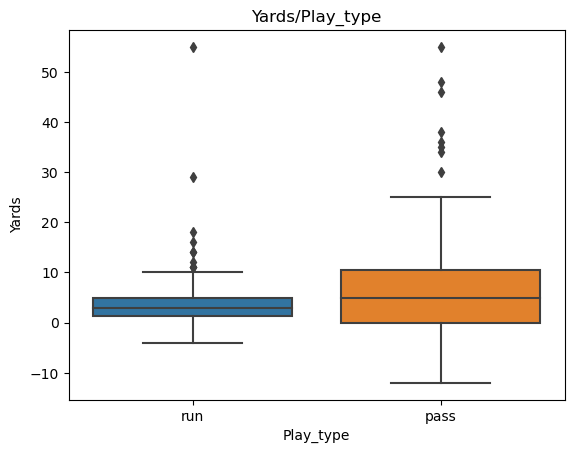

In [19]:
sns.boxplot(data=df, x='play_type', y='yards_gained')

plt.xlabel('Play_type')
plt.ylabel('Yards')
plt.title('Yards/Play_type')

------

## Shotgun

In [20]:
sg_yards = df[df['shotgun'] == 1]
sg_att = sg_yards.shape[0]

In [21]:
sg_yards = sg_yards['yards_gained'].sum()

In [22]:
avgsg_yards = avg_df[avg_df['shotgun'] == 1]
avgsg_att = avgsg_yards.shape[0]
avgsg_yards = avgsg_yards['yards_gained'].sum()

In [23]:
print(f'Shotgun yds/att: {sg_yards/sg_att:.2f} yds/play, the average for the NFL is {avgsg_yards/avgsg_att:.2f}')

Shotgun yds/att: 4.94 yds/play, the average for the NFL is 5.14


## Singleback 

In [24]:
sb_yards = df[df['shotgun'] == 0]
sb_att = sb_yards.shape[0]

In [25]:
sb_yards = sb_yards['yards_gained'].sum()

In [26]:
avgsb_yards = avg_df[avg_df['shotgun'] == 0]
avgsb_att   = avgsb_yards.shape[0]
avgsb_yards = avgsb_yards['yards_gained'].sum()

In [27]:
print(f'Singleback yds/att: {sb_yards/sb_att:.2f} yds/play, the average for the NFL is {avgsb_yards/avgsb_att:.2f}')

Singleback yds/att: 5.92 yds/play, the average for the NFL is 2.08


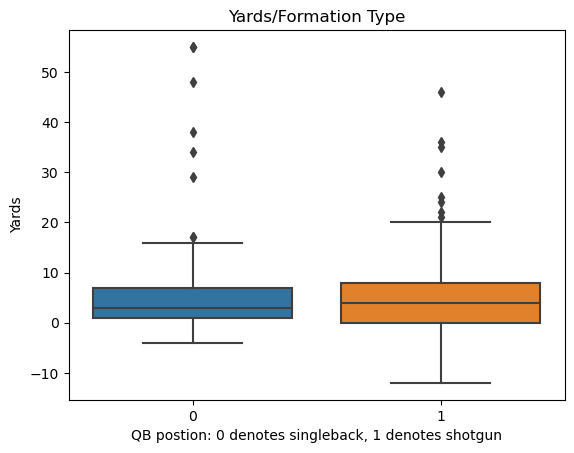

In [28]:
sns.boxplot(data=df, x='shotgun', y='yards_gained')

plt.xlabel('QB postion: 0 denotes singleback, 1 denotes shotgun')
plt.ylabel('Yards')
plt.title('Yards/Formation Type');

--------

## Pass Length

In [29]:
pass_ = (df[df['pass_length'] != 'NaN'])
pass_counts = pass_['pass_length'].value_counts()


In [30]:
pass_len = pass_.groupby(['pass_length']).sum()


C:\Users\ps3ma\AppData\Local\Temp\ipykernel_34200\2533342065.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pass_len = pass_.groupby(['pass_length']).sum()


In [31]:
short_att = pass_counts.iloc[0]
deep_att = pass_counts.iloc[1]

In [32]:
deep_yds = pass_len.iloc[0, 15]
short_yds = pass_len.iloc[1,15]

In [33]:
print(f' Short yds/att: {short_yds/short_att:.2f}')

print(f' Deep yds/att: {deep_yds/deep_att:.2f}')

 Short yds/att: 7.43
 Deep yds/att: 8.28


---------

## Pass Location



In [34]:
pass_locs = pass_['pass_location'].value_counts()

In [35]:
pass_loc_yds = pass_.groupby(['pass_location']).sum()

C:\Users\ps3ma\AppData\Local\Temp\ipykernel_34200\3950202791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pass_loc_yds = pass_.groupby(['pass_location']).sum()


In [36]:
pass_left_att = pass_locs.iloc[0]
pass_right_att = pass_locs.iloc[1]
pass_mid_att = pass_locs.iloc[2]

pass_left_yds = pass_loc_yds.iloc[0,15]
pass_right_yds = pass_loc_yds.iloc[2,15]
pass_mid_yds = pass_loc_yds.iloc[1,15]

In [37]:
print(f' left yds/att: {pass_left_yds/pass_left_att:.2f}')

print(f' middle yds/att: {pass_mid_yds/pass_mid_att:.2f}')

print(f' right yds/att: {pass_right_yds/pass_right_att:.2f}')

 left yds/att: 7.74
 middle yds/att: 6.63
 right yds/att: 7.96


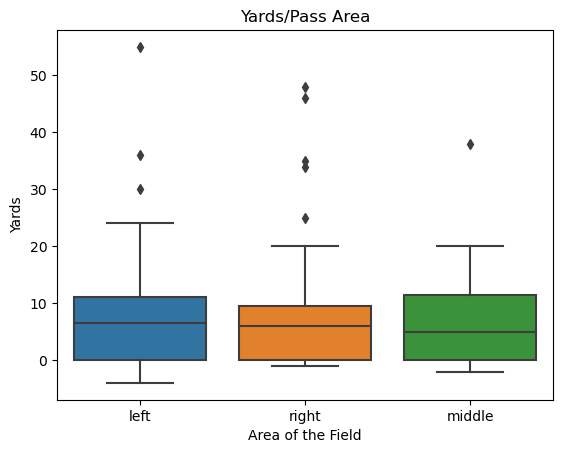

In [38]:
sns.boxplot(data=df, x='pass_location', y='yards_gained')

plt.xlabel('Area of the Field')
plt.ylabel('Yards')
plt.title('Yards/Pass Area');

---------

## Run Location

In [39]:
run_ = (df[df['run_location'] != 'NaN'])
run_loc_atts = run_['run_location'].value_counts()

In [40]:
run_locs = run_.groupby(['run_location']).sum()
run_loc_yds = run_locs['yards_gained']

C:\Users\ps3ma\AppData\Local\Temp\ipykernel_34200\3637695240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  run_locs = run_.groupby(['run_location']).sum()


In [41]:
run_left_att = run_loc_atts.iloc[0]
run_right_att = run_loc_atts.iloc[2]
run_mid_att = run_loc_atts.iloc[1]

run_left_yds = run_loc_yds.iloc[0]
run_right_yds = run_loc_yds.iloc[2]
run_mid_yds = run_loc_yds.iloc[1]

In [42]:
print(f' left yds/att: {run_left_yds/run_left_att:.2f}')

print(f' middle yds/att: {run_mid_yds/run_mid_att:.2f}')

print(f' right yds/att: {run_right_yds/run_right_att:.2f}')

 left yds/att: 2.90
 middle yds/att: 3.58
 right yds/att: 7.26


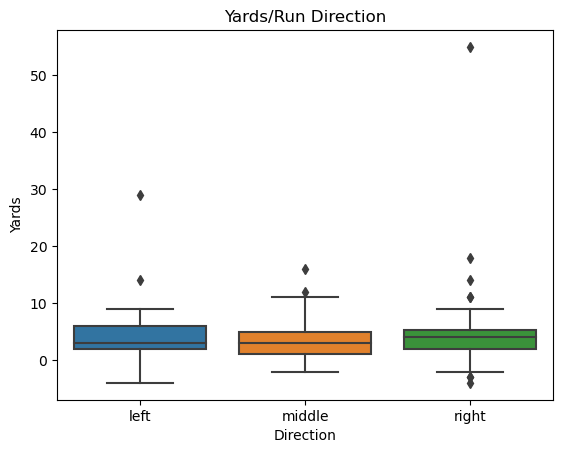

In [43]:
sns.boxplot(data=run_, x='run_location', y='yards_gained')

plt.xlabel('Direction')
plt.ylabel('Yards')
plt.title('Yards/Run Direction');

-------------

## Run Gaps

In [44]:
run_gaps_att = run_['run_gap'].value_counts()

In [45]:
run_gap = run_.groupby(['run_gap']).sum()
run_gap_yds = run_gap['yards_gained']

C:\Users\ps3ma\AppData\Local\Temp\ipykernel_34200\3208655959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  run_gap = run_.groupby(['run_gap']).sum()


In [46]:
run_end_att = run_gaps_att.iloc[0]
run_tackle_att = run_gaps_att.iloc[2]
run_guard_att = run_gaps_att.iloc[1]

run_end_yds = run_gap_yds.iloc[0]
run_tackle_yds = run_gap_yds.iloc[2]
run_guard_yds = run_gap_yds.iloc[1]

In [47]:
print(f' end yds/att: {run_end_yds/run_end_att:.2f}')

print(f' guard yds/att: {run_guard_yds/run_guard_att:.2f}')

print(f' tackleyds/att: {run_tackle_yds/run_tackle_att:.2f}')

 end yds/att: 3.38
 guard yds/att: 7.74
 tackleyds/att: 2.91


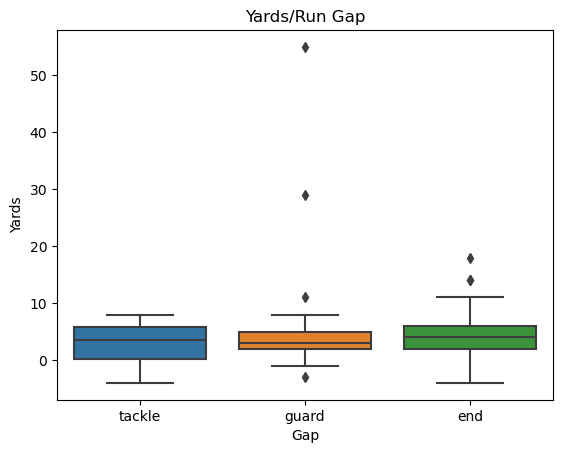

In [48]:
sns.boxplot(data=run_, x='run_gap', y='yards_gained')

plt.xlabel('Gap')
plt.ylabel('Yards')
plt.title('Yards/Run Gap');